<a href="https://colab.research.google.com/github/Klrojasm/SyS/blob/main/Copia_de_trabajo_en_clase_de_9_de_noviembre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ejercicio**

* Qué relación tiene $\lambda$ con el la salida obtenida al resolver la EDO?
* Puede generalizar sus resultados a una EDO de orden arbitrario?

El peso $\lambda$ asociado con x(t) se conoce como valor propio escalar del sistema. Por lo tanto, además de ser un factor de ponderación, una función propia no se modifica al pasar por el sistema.

De igual manera cuando resolvemos una EDO utilizando la transformada de Laplace, la constante λ está asociada a la variable transformada. Si consideramos una EDO lineal homogénea de segundo orden


El método de la transformada de Laplace se puede generalizar para resolver ecuaciones diferenciales ordinarias (EDO) de orden arbitrario. Para ilustrar esto, consideremos una EDO lineal homogénea de orden nn:

any(n)+an−1y(n−1)+…+a1y′+a0y=0an​y(n)+an−1​y(n−1)+…+a1​y′+a0​y=0

donde y(n)y(n) denota la n-ésima derivada de y con respecto al tiempo t, y an,an−1,…,a0an​,an−1​,…,a0​ son constantes.

Aplicando la transformada de Laplace a ambos lados de la ecuación y utilizando las propiedades de la transformada de Laplace, se obtiene:

$anL${y(n)}$+an−1L${y(n−1)}$+…+a1L${y′}$+a0L${y}$=0an​L${y(n)}$+an−1​L${y(n−1)}$+…+a1$​L{y′}$+a0​L${y}$=0$

Donde LL denota la transformada de Laplace. Luego, utilizando las propiedades de la transformada de Laplace para las derivadas, la ecuación se convierte en una ecuación algebraica en términos de la variable transformada Y(s), que está relacionada con la función y(t).

Finalmente, resolviendo la ecuación algebraica en Y(s), podemos encontrar la expresión para Y(s). Luego, aplicando la transformada inversa de Laplace, obtenemos la solución en el dominio del tiempo y(t).

La solución en términos de la variable transformada Y(s) puede implicar términos con la constante λ debido a la parte imaginaria de ss. La elección específica de la constante λ está relacionada con las condiciones iniciales del problema y la forma de la solución deseada. En la práctica, este enfoque se aplica a menudo para resolver EDO de orden arbitrario utilizando la transformada de Laplace.



**Ejercicio**

* ¿Qué relación tiene $\lambda$ con el la salida obtenida al resolver la EDO?

> ***R/*** En el cuaderno se planteó que $x(t)=e^{st}$ y $y(t)=\lambda\cdot e^{st}$. Y se reemplaza en la ecuación

$$
x(t)=a_{0}y(t) + a_{1}\frac{dy(t)}{dt} + a_{2}\frac{d^{2}y(t)}{dt^{2}}
$$

Entonces quedaría

$$
e^{st}=a_{0}\lambda e^{st} + a_{1}\lambda se^{st} + a_{2} \lambda s^{2}e^{st}
$$

Agrupando términos comunos daría

$$
e^{st}=\lambda e^{st}(a_{0}+a_{1}s+a_{2}s^{2})
$$

Luego, se despeja $\lambda$ y quedaría

$$
\lambda=\frac{1}{a_{0}+a_{1}s+a_{2}s^{2}}
$$

Como se puede evidenciar, para la salida $y(t)$ planteada en el cuaderno, $\lambda$ dio lo mismo, pero multiplicándolo por $e^st$.

* ¿Puede generalizar sus resultados a una EDO de orden arbitrario?

> ***R/*** Sí, esta expresión se puede generalizar a

$$
x(t)=a_{0}y(t) + a_{1}\frac{dy(t)}{dt} + a_{2}\frac{d^{2}y(t)}{dt^{2}} + \ldots + a_m\frac{d^{m}y(t)}{dt^m}
$$

Entonces quedaría

$$
e^{st}=a_{0}\lambda e^{st} + a_{1}\lambda se^{st} + a_{2} \lambda s^{2}e^{st}+ \ldots + a_m\lambda s^m e^{st}
$$

Agrupando términos comunos daría

$$
e^{st}=\lambda e^{st}(a_{0}+a_{1}s+a_{2}s^{2}+\ldots + a_ms^m)
$$

Luego, se despeja $\lambda$ y quedaría

$$
\lambda=\frac{1}{a_{0}+a_{1}s+a_{2}s^{2}+\ldots+a_{m} \lambda s^{m}}
$$

Condiciones iniciales diferentes cero

\begin{equation}
y(t) = y_\text{ext}(t) + y_\text{int}(t)
\end{equation}

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = X/(L*C*s**2 + R*C*s + 1)
RLC = {R:1 , L: sym.Rational('.5'), C: sym.Rational('.3')}

y = sym.inverse_laplace_transform(Y.subs(RLC).subs(X, 1), s, t) # entrada impulso que en laplace es 1
y = y.simplify()
y

        -t    ⎛√51⋅t⎞
20⋅√51⋅ℯ  ⋅sin⎜─────⎟
              ⎝  3  ⎠
─────────────────────
          51         

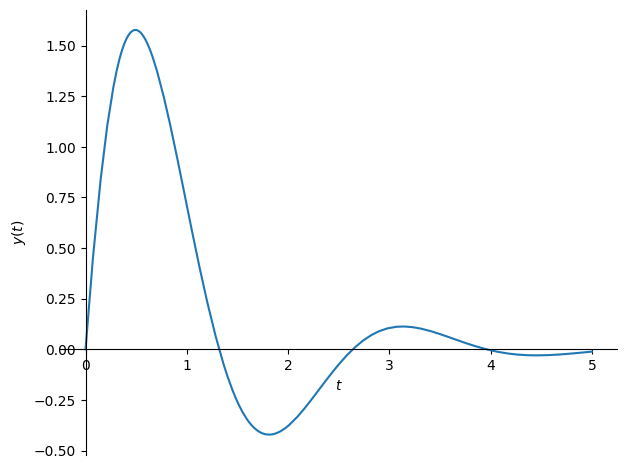

In [ ]:
sym.plot(y, (t, 0, 5), xlabel='$t$', ylabel='$y(t)$');

In [ ]:
yext = y
yext.simplify()

        -t    ⎛√51⋅t⎞
20⋅√51⋅ℯ  ⋅sin⎜─────⎟
              ⎝  3  ⎠
─────────────────────
          51         

In [ ]:
i0, y0 = sym.symbols('i0 y0', real=True)

Yint = (R*C + L*C*s) / (L*C*s**2 + R*C*s + 1) * y0 + L / (L*C*s**2 + R*C*s + 1) * i0
Yint

       L⋅i₀           y₀⋅(C⋅L⋅s + C⋅R) 
────────────────── + ──────────────────
     2                    2            
C⋅L⋅s  + C⋅R⋅s + 1   C⋅L⋅s  + C⋅R⋅s + 1

In [ ]:
yint = sym.inverse_laplace_transform(Yint.subs(RLC).subs(i0, 1).subs(y0, -1), s, t)
yint

       -t    ⎛√51⋅t⎞                 
7⋅√51⋅ℯ  ⋅sin⎜─────⎟                 
             ⎝  3  ⎠    -t    ⎛√51⋅t⎞
──────────────────── - ℯ  ⋅cos⎜─────⎟
         51                   ⎝  3  ⎠

In [ ]:
y = yext + yint
y.simplify()

⎛         ⎛√51⋅t⎞             ⎞    
⎜9⋅√51⋅sin⎜─────⎟             ⎟    
⎜         ⎝  3  ⎠      ⎛√51⋅t⎞⎟  -t
⎜──────────────── - cos⎜─────⎟⎟⋅ℯ  
⎝       17             ⎝  3  ⎠⎠    

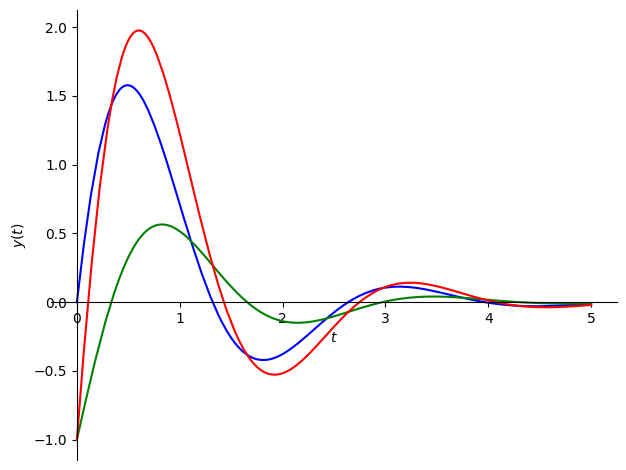

In [ ]:
p1 = sym.plot(yext, (t, 0, 5), line_color='b', xlabel='$t$', ylabel='$y(t)$', show=False)
p2 = sym.plot(yint, (t, 0, 5), line_color='g', show=False)
p3 = sym.plot(y, (t, 0, 5), line_color='r', show=False)
p1.extend(p2)
p1.extend(p3)
p1.show()

Para el escalon unitario, reiniciamos nuestras condiciones en 0

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = X/(L*C*s**2 + R*C*s + 1)
RLC = {R:1 , L: sym.Rational('.5'), C: sym.Rational('.3')}

y = sym.inverse_laplace_transform(Y.subs(RLC).subs(X, 1/s), s, t) # entrada escalón unitario en laplace es 1/s
y = y.simplify()
y

In [ ]:
sym.plot(y, (t, 0, 5), xlabel='$t$', ylabel='$y(t)$');

Para el caso de las condiciones iniciales diferentes de 0, tenemos
\begin{equation}
y(t) = y_\text{ext}(t) + y_\text{int}(t)
\end{equation}

In [ ]:
yext = y
yext.simplify()

In [ ]:
i0, y0 = sym.symbols('i0 y0', real=True)

Yint = (R*C + L*C*s) / (L*C*s**2 + R*C*s + 1) * y0 + L / (L*C*s**2 + R*C*s + 1) * i0
Yint

In [ ]:
yint = sym.inverse_laplace_transform(Yint.subs(RLC).subs(i0, 2).subs(y0, 3), s, t)
yint

In [ ]:
y = yext + yint
y.simplify()

para así gracias siendo la linea verde la parte interna, la azul la parte externa y la linea roja la de salida.

p1 = sym.plot(yext, (t, 0, 5), line_color='b', xlabel='$t$', ylabel='$y(t)$', show=False)
p2 = sym.plot(yint, (t, 0, 5), line_color='g', show=False)
p3 = sym.plot(y, (t, 0, 5), line_color='r', show=False)
p1.extend(p2)
p1.extend(p3)
p1.show()